In [2]:
!pip install scikit-bio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.9 MB/s eta 0:00:00


In [3]:
! mkdir metagenomics
! mkdir metagenomics/data
! mkdir metagenomics/results

In [5]:
! wget https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/products/HMP2/MGX/2018-05-04/taxonomic_profiles.tsv.gz -O metagenomics/data/taxonomic_profiles.tsv.gz
! gunzip metagenomics/data/taxonomic_profiles.tsv.gz

--2025-11-08 18:32:12--  https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/products/HMP2/MGX/2018-05-04/taxonomic_profiles.tsv.gz
Resolving g-227ca.190ebd.75bc.data.globus.org (g-227ca.190ebd.75bc.data.globus.org)... 140.247.111.40, 140.247.111.39
Connecting to g-227ca.190ebd.75bc.data.globus.org (g-227ca.190ebd.75bc.data.globus.org)|140.247.111.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘metagenomics/data/taxonomic_profiles.tsv.gz’

metagenomics/data/t     [   <=>              ] 651.01K   691KB/s    in 0.9s    

2025-11-08 18:32:14 (691 KB/s) - ‘metagenomics/data/taxonomic_profiles.tsv.gz’ saved [666634]



In [27]:
! wget https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/metadata/hmp2_metadata_2018-08-20.csv -O metagenomics/data/hmp2_metadata_2018-08-20.csv

--2025-11-08 19:00:21--  https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/metadata/hmp2_metadata_2018-08-20.csv
Resolving g-227ca.190ebd.75bc.data.globus.org (g-227ca.190ebd.75bc.data.globus.org)... 140.247.111.39, 140.247.111.40
Connecting to g-227ca.190ebd.75bc.data.globus.org (g-227ca.190ebd.75bc.data.globus.org)|140.247.111.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘metagenomics/data/hmp2_metadata_2018-08-20.csv’

metagenomics/data/h     [     <=>            ]   8.65M  5.09MB/s    in 1.7s    

2025-11-08 19:00:24 (5.09 MB/s) - ‘metagenomics/data/hmp2_metadata_2018-08-20.csv’ saved [9074342]



In [35]:
import pandas as pd

data = pd.read_csv('metagenomics/data/taxonomic_profiles.tsv', sep='\t')
data = data.set_index('#SampleID')
print(data.head())

metadata = pd.read_csv('metagenomics/data/hmp2_metadata_2018-08-20.csv')
metadata = metadata.set_index('External ID')
print(metadata.head())

                                                    CSM5FZ4M  CSM5MCUO  \
#SampleID                                                                
k__Archaea                                               0.0       0.0   
k__Archaea|p__Euryarchaeota                              0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methanobacteria           0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methanobacteria|...       0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methanobacteria|...       0.0       0.0   

                                                    CSM5MCVL  CSM5MCVN  \
#SampleID                                                                
k__Archaea                                               0.0       0.0   
k__Archaea|p__Euryarchaeota                              0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methanobacteria           0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methanobacteria|...       0.0       0.0   
k__Archaea|p__Euryarchaeota|c__Methan

/tmp/ipython-input-4272185344.py:7: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('metagenomics/data/hmp2_metadata_2018-08-20.csv')


In [30]:
metadata.columns.tolist()

['Project',
 'External ID',
 'Participant ID',
 'site_sub_coll',
 'data_type',
 'week_num',
 'date_of_receipt',
 'interval_days',
 'visit_num',
 'Research Project',
 'PDO Number',
 'GSSR IDs',
 'Product',
 'LCSET',
 'Aggregated Lanes',
 'WR ID',
 '# Lanes in Aggregation',
 'reads_raw',
 'reads_filtered',
 'reads_qc_fail',
 'reads_human',
 'reads_ribosomal',
 'reads_viral',
 'Delta',
 'IntervalName',
 'IntervalSequence',
 'ProjectSpecificID',
 'site_name',
 'Age at diagnosis',
 'Has the subject had a cholecystectomy?',
 'Has the subject had a prior abdominal surgery (other)?',
 'Has the next visit been scheduled?',
 'Has the subject been given new stool kits?',
 'Has the subject completed the FFQ/YAQ?',
 'Education Level',
 'Occupation',
 'Scanned FFQ/YAQ document:',
 'FFQ/YAQ results:',
 'Has the subject had an appendectomy?',
 'Has the subject had a tonsillectomy?',
 'biopsy_location',
 'Were study bloods drawn?',
 'Whole blood received at Broad:',
 'Serum tube #1 received at CSMC:',


In [51]:
groups = metadata[['diagnosis']].reset_index().drop_duplicates().set_index('External ID')

# --- 2. Alpha Diversity Analysis ---

In [25]:
from skbio.diversity.alpha import shannon
from skbio.stats.ordination import pcoa

alpha_diversity = {}

for col in data.columns:
    alpha_diversity[col] = shannon(data[col], base=2)

alpha_diversity = pd.DataFrame.from_dict(alpha_diversity, orient='index')

In [26]:
alpha_diversity

,0
CSM5FZ4M,4.411125
CSM5MCUO,5.122843
CSM5MCVL,4.565702
CSM5MCVN,4.459389
CSM5MCW6,3.883694
...,...
CSM6J2H9_P,4.919003
HSM5MD4A_P,4.804397
CSM5MCUW_P,4.995571
ESM5MEBA_P,4.522293


In [49]:
groups.head()

,External ID,diagnosis
0,206615,CD
1,206614,CD
2,206617,CD
3,206619,CD
4,206616,CD


In [52]:
alpha_diversity_df = pd.DataFrame({
    'Shannon_Diversity': alpha_diversity.iloc[:, 0],
    'Group': [groups.loc[i, 'diagnosis'] for i in alpha_diversity.index]
})
alpha_diversity_df.head()

,Shannon_Diversity,Group
CSM5FZ4M,4.411125,UC
CSM5MCUO,5.122843,UC
CSM5MCVL,4.565702,CD
CSM5MCVN,4.459389,CD
CSM5MCW6,3.883694,CD



## Alpha Diversity (Shannon) Test
Mann-Whitney U P-value: 0.0349


/tmp/ipython-input-2757821684.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Shannon_Diversity', data=alpha_diversity_df, palette='Set2')


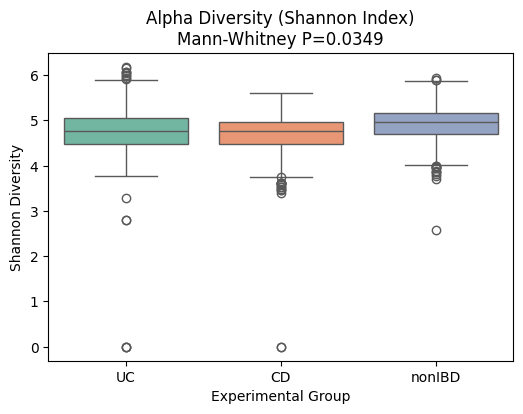

In [53]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical test for Alpha Diversity between groups
stat, p_alpha = mannwhitneyu(
    alpha_diversity_df[alpha_diversity_df['Group'] == 'CD']['Shannon_Diversity'],
    alpha_diversity_df[alpha_diversity_df['Group'] == 'UC']['Shannon_Diversity']
)

print(f"\n## Alpha Diversity (Shannon) Test")
print(f"Mann-Whitney U P-value: {p_alpha:.4f}")

# Visualization of Alpha Diversity
plt.figure(figsize=(6, 4))
sns.boxplot(x='Group', y='Shannon_Diversity', data=alpha_diversity_df, palette='Set2')
plt.title(f'Alpha Diversity (Shannon Index)\nMann-Whitney P={p_alpha:.4f}')
plt.xlabel('Experimental Group')
plt.ylabel('Shannon Diversity')
plt.show()

# --- 3. Differential Abundance Testing (Taxonomic) ---

In [59]:
data.loc[:,'CSM5MCUO']

,CSM5MCUO
#SampleID,
k__Archaea,0.0
k__Archaea|p__Euryarchaeota,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,0.0
...,...
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_phi2958PVL,0.0
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Staphylococcus_phage_phi2958PVL|t__PRJNA32173,0.0
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Viruses_noname|g__Viruses_noname|s__Tomato_begomovirus_satellite_DNA_beta,0.0


In [64]:


# We'll test for taxa significantly different between Group A and Group B
p_values = {}
for taxa_name in data.index:
    group_a_data = data.loc[taxa_name, list(set(data.columns).intersection(groups[groups['diagnosis'] == 'CD'].index))]
    group_b_data = data.loc[taxa_name, list(set(data.columns).intersection(groups[groups['diagnosis'] == 'UC'].index))]

    # Use Mann-Whitney U test (non-parametric, suitable for non-normal count data)
    stat, p_val = mannwhitneyu(group_a_data, group_b_data, alternative='two-sided')
    p_values[taxa_name] = p_val

# Convert results to DataFrame and apply multiple testing correction (e.g., Benjamini/Hochberg FDR)
diff_taxa_results = pd.DataFrame(list(p_values.items()), columns=['Taxa', 'P_Value'])
# Note: statsmodels is typically used for FDR correction, but we'll show raw P-value here for simplicity
# from statsmodels.sandbox.stats.multicomp import multipletests
# _, corrected_p, _, _ = multipletests(diff_taxa_results['P_Value'], method='fdr_bh')
# diff_taxa_results['FDR_P_Value'] = corrected_p

significant_taxa = diff_taxa_results[diff_taxa_results['P_Value'] < 0.05].sort_values('P_Value')

print(f"\n## Differential Abundance Test (Mann-Whitney U, P < 0.05)")
print(f"Found {len(significant_taxa)} significantly different taxa:")
print(significant_taxa.head())
print("-" * 40)




## Differential Abundance Test (Mann-Whitney U, P < 0.05)
Found 410 significantly different taxa:
                                                  Taxa       P_Value
766  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  5.994635e-18
767  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  5.994635e-18
765  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  2.358778e-16
266  k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...  8.721310e-14
270  k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...  1.455894e-13
----------------------------------------


# --- 4. Beta Diversity Analysis (Principal Component Analysis - PCA) ---

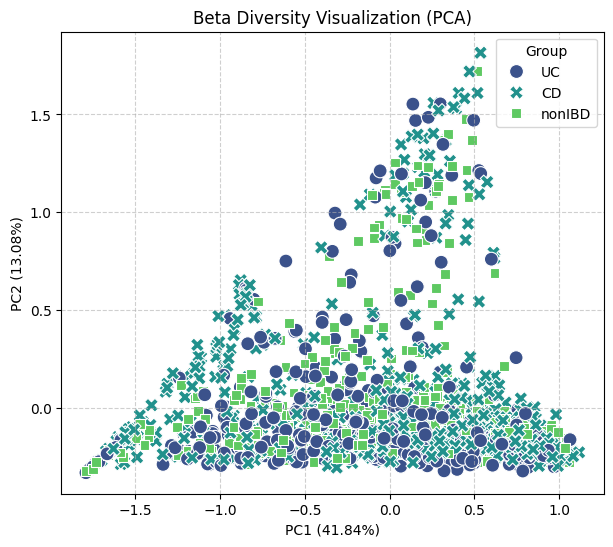

In [68]:

from sklearn.decomposition import PCA
# While PCoA (using distances like Bray-Curtis) is standard, PCA is a robust way to visualize clustering.
# Use the relative abundance data (Taxa as features, Samples as observations)
X = data.T # Transpose: Samples are rows, Taxa are columns

# Run PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=X.index)
pca_df['Group'] = [groups.loc[i, 'diagnosis'] for i in pca_df.index]

explained_variance = pca.explained_variance_ratio_

# Visualization of Beta Diversity
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Group', data=pca_df,
    s=100, palette='viridis', style='Group'
)
plt.title('Beta Diversity Visualization (PCA)')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.legend(title='Group')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()